In [1]:
import json
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageEnhance
import random
import math
import os
import numpy as np
import imutils
import pandas as pd
import cv2
import requests
import matplotlib.patches as patches

In [2]:
pip install imutils

Note: you may need to restart the kernel to use updated packages.


In [3]:
with open('C:/Users/Dell/Downloads/cat_dog/cat_dog_annotations.json', 'r') as f:

    json_dict = json.load(f)

fetch 1st image from json file

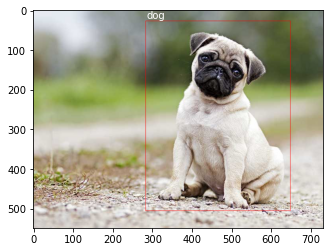

In [4]:
img_dict = list(json_dict['_via_img_metadata'].values())[0]

region_dict = img_dict['regions'][0]

region_attri=region_dict['region_attributes']

shape_dict = region_dict['shape_attributes']

label=list(region_attri['class'].keys())[0]

x = shape_dict['x']

y = shape_dict['y']

plt.text(x, y-8, label, color='white')

# Load image and draw bounding box

img = Image.open(img_dict['filename'])

draw = ImageDraw.Draw(img)

draw.rectangle((shape_dict['x'], shape_dict['y'], shape_dict['x'] + shape_dict['width'], shape_dict['y'] + shape_dict['height']), outline='red')

plt.imshow(img)

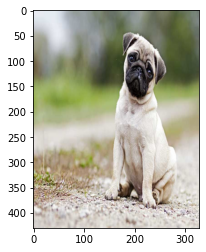

In [5]:
# Load image and bounding box coordinates
img = Image.open(img_dict['filename'])

x, y = shape_dict['x'], shape_dict['y']

w, h = shape_dict['width'], shape_dict['height']

# Calculate new size and resize image
resize_scale = random.randint(60, 100) / 100

new_w, new_h = int(resize_scale * w), int(resize_scale * h)

img_resized = img.resize((new_w, new_h))

# Adjust bounding box coordinates
x_new, y_new = int(resize_scale * x), int(resize_scale * y)

w_new, h_new = int(resize_scale * w), int(resize_scale * h)
plt.imshow(img_resized)


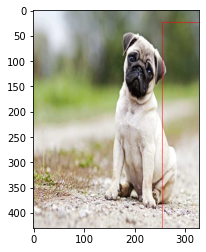

In [6]:
# Add random brightness
brightness_scale = random.uniform(0.5, 1.5)

img_brightened = ImageEnhance.Brightness(img_resized).enhance(brightness_scale)

# Draw bounding box on resized image
draw = ImageDraw.Draw(img_brightened)

draw.rectangle((x_new, y_new, x_new + w_new, y_new + h_new), outline='red')

# Display the final image
plt.imshow(img_brightened)


In [ ]:
# Load image and bounding box coordinates
img=Image.open(img_dict['filename'])

x, y = shape_dict['x'], shape_dict['y']

w, h = shape_dict['width'], shape_dict['height']

# Calculate new size and resize image
resize_scale = random.randint(60, 100) / 100

new_w, new_h = int(resize_scale * w), int(resize_scale * h)

img_resized = img.resize((new_w, new_h))

# Adjust bounding box coordinates
x_new, y_new = int(resize_scale * x), int(resize_scale * y)

w_new, h_new = int(resize_scale * w), int(resize_scale * h)

# Add random brightness
brightness_scale = random.uniform(0.5, 1.5)

img_brightened = ImageEnhance.Brightness(img_resized).enhance(brightness_scale)

# Rotate image and adjust bounding box coordinates
angle = random.randint(0,360,5)
img_rotated = img_brightened.rotate(angle, expand=True)

x_rotated, y_rotated = img_rotated.size

cx, cy = x_rotated/2, y_rotated/2

box = [(x_new, y_new), (x_new + w_new, y_new + h_new)]
new_box = []
for corner in box:
    x_corner, y_corner = corner
    x_corner -= cx
    y_corner -= cy
    x_corner, y_corner = x_corner * math.cos(math.radians(angle)) - y_corner * math.sin(math.radians(angle)), \
    x_corner * math.sin(math.radians(angle)) + y_corner * math.cos(math.radians(angle))
    x_corner += cx
    y_corner += cy
    new_box.append((x_corner, y_corner))
    
new_box = [int(i) for j in new_box for i in j]

# Draw bounding box on rotated image
draw = ImageDraw.Draw(img_rotated)

draw.rectangle(new_box, outline='red')

# Save the resulting image
img_rotated.save('result.png')

# Display the final image
plt.imshow(img_rotated)


In [ ]:
for image_id, image_data in json_dict['_via_img_metadata'].items():
    file_path = os.path.join(os.getcwd(), image_data['filename'])
    image_cv2 = cv2.imread(file_path)
    
    image_rgb = cv2.cvtColor(image_cv2, cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots()
    ax.imshow(image_rgb)

    for region in image_data['regions']:
        x = region['shape_attributes']['x']
        y = region['shape_attributes']['y']
        w = region['shape_attributes']['width']
        h = region['shape_attributes']['height']
        label = region['region_attributes']['class']

        rect = patches.Rectangle((x, y), w, h, linewidth=3, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(x, y, label, color='b', fontsize=10)
        #loop through out 7 images for rotating
        array=np.array(rect)
    plt.show()

In [ ]:
json_file = 'cat_dog_annotations.json'
with open(json_file, 'r') as f:
    json_dict = json.load(f)

for image_id, image_data in json_dict['_via_img_metadata'].items():
    file_path = os.path.join(os.getcwd(), image_data['filename'])
    image = Image.open(file_path)

    draw = ImageDraw.Draw(image)

    for region in image_data['regions']:
        x = region['shape_attributes']['x']
        y = region['shape_attributes']['y']
        w = region['shape_attributes']['width']
        h = region['shape_attributes']['height']
        label = region['region_attributes']['class']

        draw.rectangle([x, y, x+w, y+h], outline='red', width=3)
        draw.text((x, y), label, fill='blue')
        array= np.array(draw)
        for angle in range(0,360,5):
            rotated=imutils.rotate(array, angle)
            

    image.show(rotated)
